In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


# Load Data

In [20]:
df_column_names = ('data/column_names.md')
df_house = pd.read_csv('data/kc_house_data.csv')

In [21]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [22]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [23]:
df_house['sqft_basement'].value_counts(normalize=True)


0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
2850.0    0.000046
2180.0    0.000046
1913.0    0.000046
1248.0    0.000046
3000.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [24]:
# print top 5 most frequent values in each column
for col in df_house.columns:
    print(col, '\n', df_house_data[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.

In [25]:
# check all unique values for 'grade'
grade_values = list(df_house['grade'].unique())
grade_values.sort()
grade_values

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [26]:

# check all unique values for ''
condition_values = list(df_house['condition'].unique())
condition_values.sort()
condition_values

[1, 2, 3, 4, 5]

In [27]:
df_house['grade'] = df_house['grade'].map(lambda x: x-3) # map a function to subtract 3 from each value 
grade_values = list(df_house['grade'].unique()) # confirm that change has taken place
grade_values.sort()
grade_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [28]:
# convert to datetime
df_house['date'] = pd.to_datetime(df_house['date'])

In [31]:
# assume that '0.0' and '?' values in the column means no basement
df_house['sqft_basement'] = df_house['sqft_basement'].map(lambda x: 0 if x == '?' else x)
# convert column to float
df_house['sqft_basement'] = df_house['sqft_basement'].astype('float')
# add column called basement
df_house['basement'] = df_house['sqft_basement'].map(lambda x: 1 if x > 0 else 0)


In [33]:
# assign continous variables to a list
continuous = ['sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


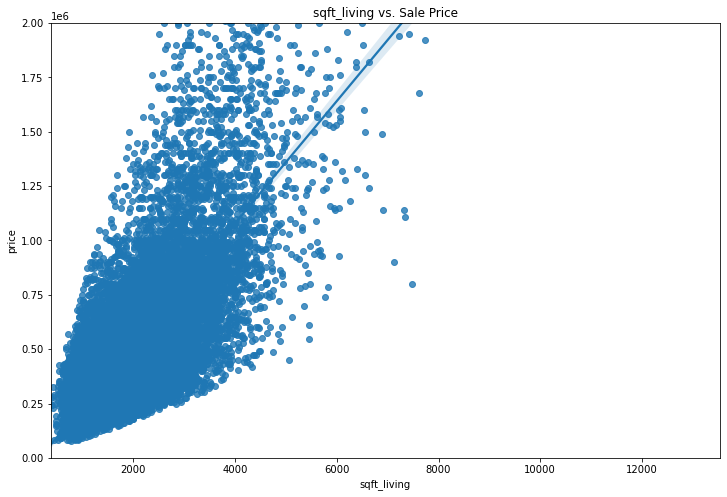

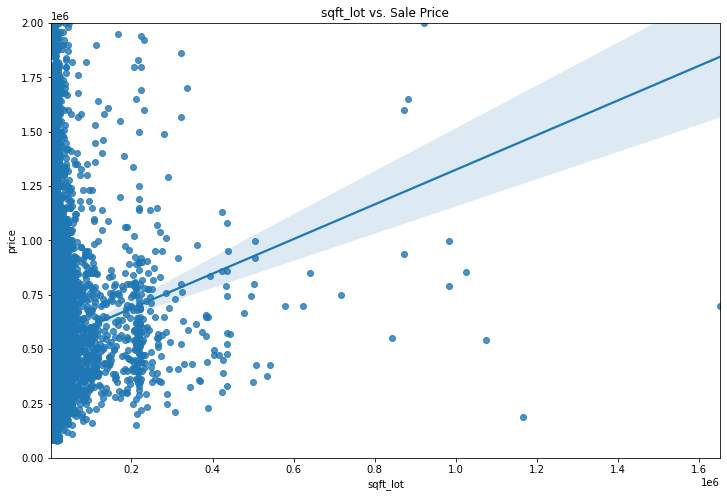

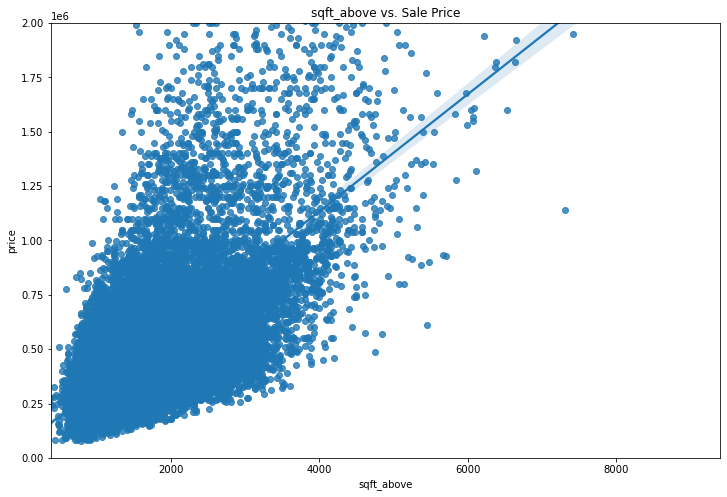

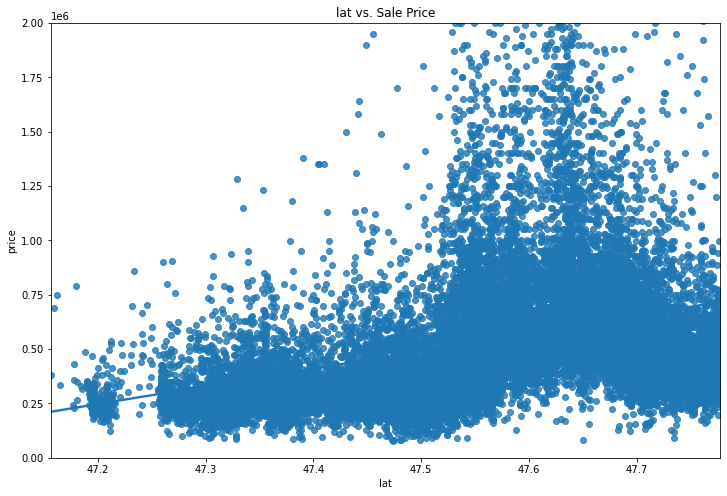

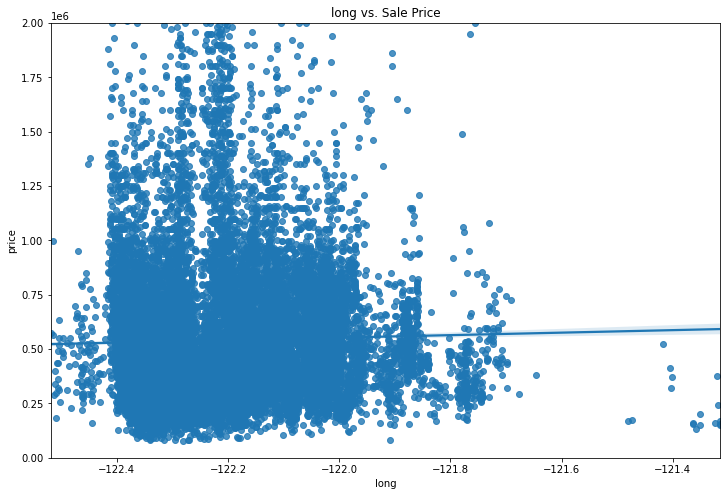

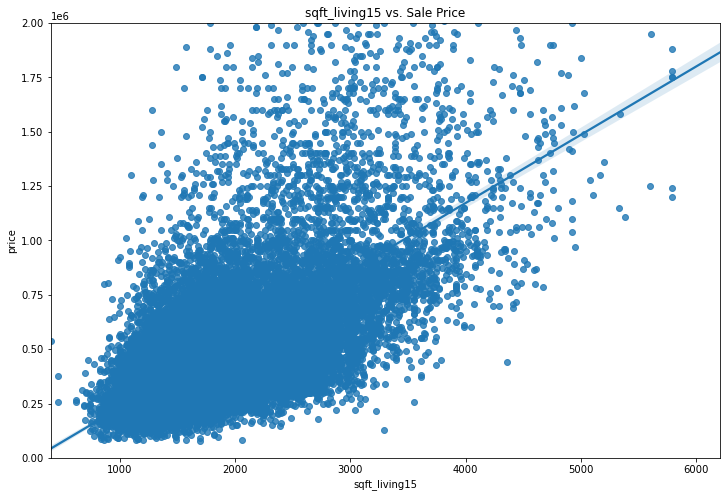

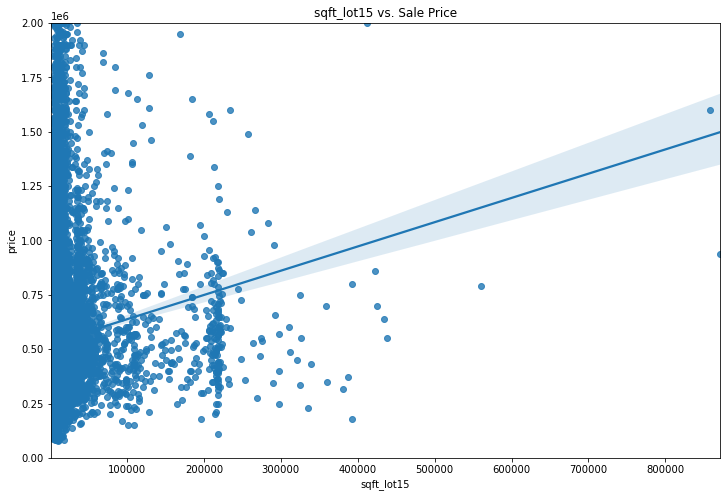

In [38]:
# price vs continuous variables
for variable in continuous:
    ax, figure = plt.subplots(1,1,figsize=(12,8))
    plt.ylim(0,2000000)
    sns.regplot(x=variable, y='price', data=df_house)
    plt.title("{} vs. Sale Price".format(variable))


In [39]:
# assign categorical variables to a list
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'viewed', 'condition', 'grade', 
                         'yr_built', 'Renovated_since_1980', 'zipcode', 'year_sold', 'month_sold', 'season_sold',
                         'basement']

ValueError: Could not interpret input 'viewed'

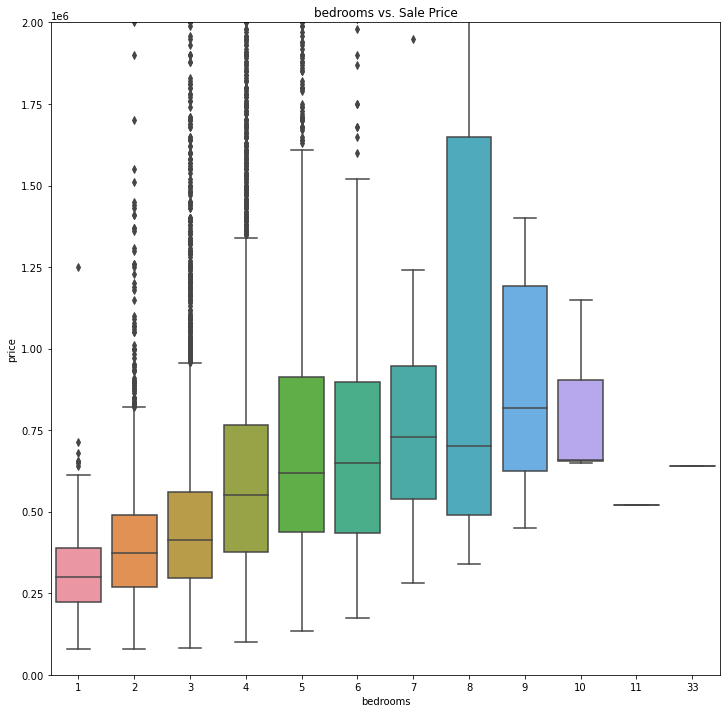

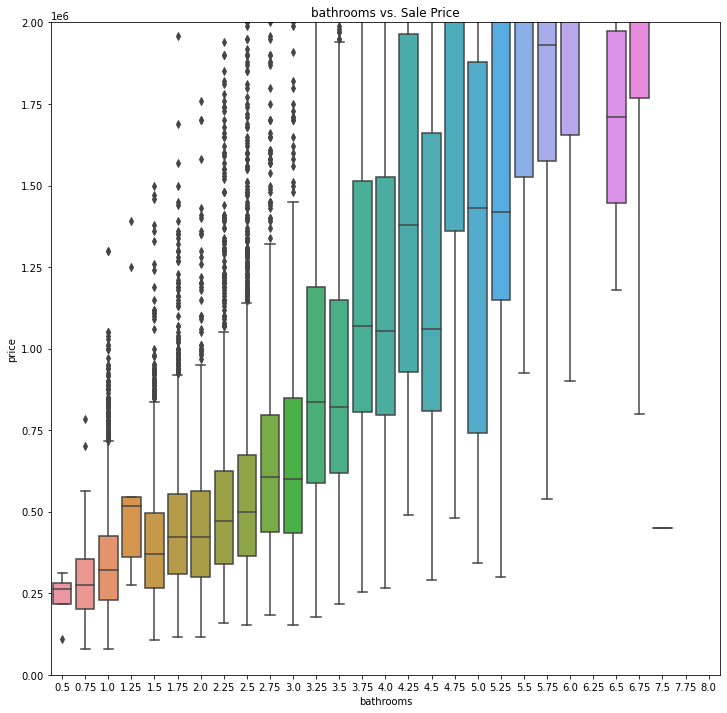

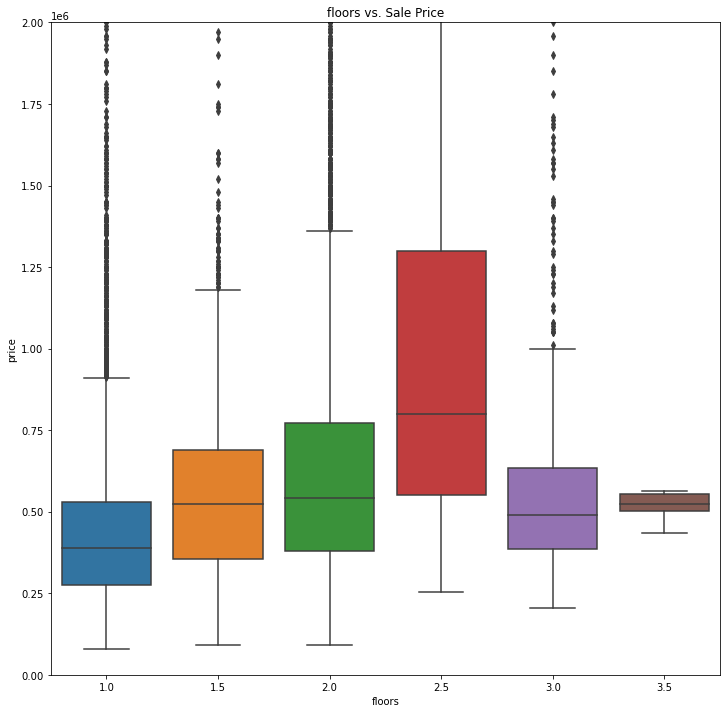

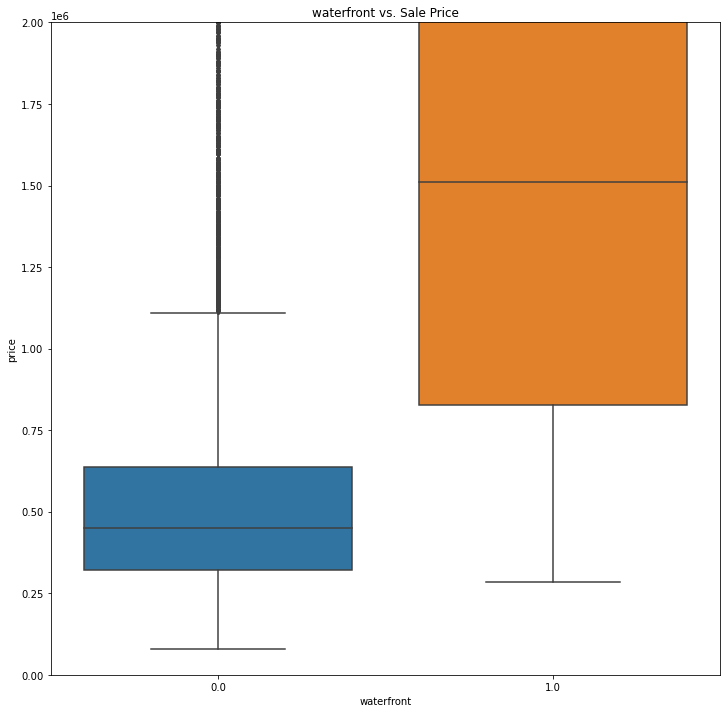

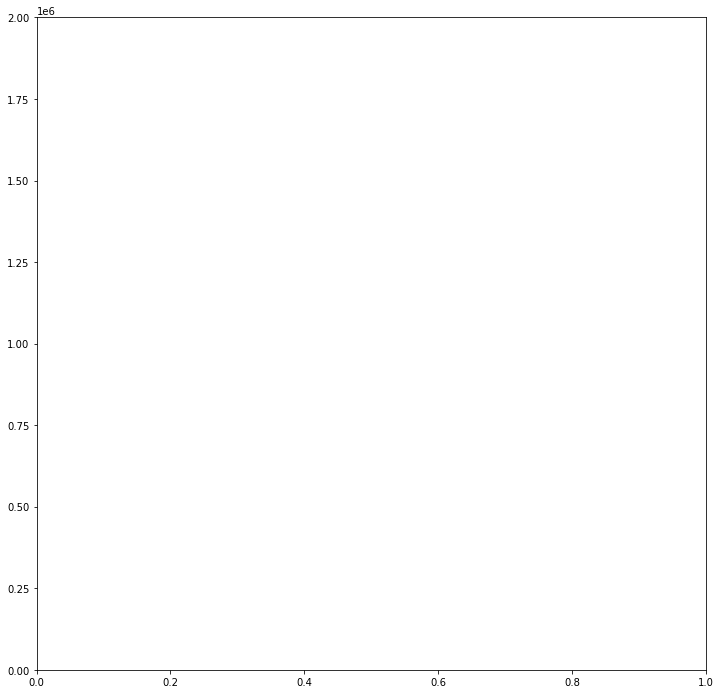

In [45]:
# price vs categorical variables
for variable in categorical:
    ax, figure = plt.subplots(1,1,figsize=(12,12))
    plt.ylim(0,2000000)
    sns.boxplot(x=variable, y='price', data=df_house)
    plt.title("{} vs. Sale Price".format(variable))


In [46]:
# add column price per square foot
df_house['price_per_sf'] = df_house.apply(lambda row: row['price'] / row['sqft_living'], axis=1)

In [47]:
# bin house sizes and group by house size

In [48]:
# House Size vs. Price per Sqaure Foot Visualization

In [49]:
# one-hot encode categorical variables

In [50]:
# Multicollinearity?

In [51]:
# create model